In [1]:
import pandas as pd
import mysql.connector

# Database connection
conn = mysql.connector.connect(
    host='192.155.100.47',
    user='youtube',
    password='!qR%xf|L3@',
    database='insta_scraper'
)

In [2]:
import pandas as pd
import mysql.connector

# Database connection
conn = mysql.connector.connect(
    host='192.155.100.47',
    user='youtube',
    password='!qR%xf|L3@',
    database='insta_scraper'
)

# SQL query to join insta_profile_scraper and user_posts tables
query = """
SELECT 
    ips.id as profile_id,
    ips.username,
    ips.followers_count,
    ips.follows_count,
    ips.posts_count,
    up.post_id as post_id,
    up.like_count,
    up.comment_count,
    up.video_view_count
FROM 
    insta_profile_scraper ips
JOIN 
    user_posts up ON ips.id = up.user_id
"""

# Execute the query and fetch the data
df = pd.read_sql(query, conn)

# Calculate total likes, views, comments for each user
# df_grouped = df.groupby(['profile_id', 'username', 'followers_count', 'following_count', 'post_count']).agg(
#     total_likes=pd.NamedAgg(column='likes', aggfunc='sum'),
#     total_views=pd.NamedAgg(column='views', aggfunc='sum'),
#     total_comments=pd.NamedAgg(column='comments', aggfunc='sum')
# ).reset_index()

# Close the database connection
conn.close()

# Display the dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Instagram DataFrame", dataframe=df_grouped)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3702321033.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.tail()

,profile_id,username,followers_count,follows_count,posts_count,post_id,like_count,comment_count,video_view_count
239910,48961573961,zorro.shiraz,6085,7504,16184,3369067776611331405,0,0,3
239911,48961573961,zorro.shiraz,6085,7504,16184,3369074874447362093,2,0,6
239912,66304875603,wzings,62,22,8,3369161839358549211,12,4,87
239913,64118980398,zinger_amazing,991,642,8,3369165687077805871,-1,1,0
239914,8142397873,_.miraaj_,1082,585,6,3369253113964140907,155,29,391


In [4]:
df_grouped = df.groupby(['profile_id', 'username', 'followers_count', 'follows_count', 'posts_count']).agg(
    total_likes=pd.NamedAgg(column='like_count', aggfunc='sum'),
    total_comments=pd.NamedAgg(column='comment_count', aggfunc='sum'),
    total_views=pd.NamedAgg(column='video_view_count', aggfunc='sum')
).reset_index()

In [6]:
df_grouped.head(5)

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views
0,50058,zitter,20,0,4,12,0,0
1,287535,ziti,63,0,1,18,18,0
2,1503892,zither,6,0,7,16,0,0
3,2682316,zosterops,1189,187,193,11460,933,14872
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019


In [7]:
df_grouped['engagement_rate'] = df_grouped['total_likes']/df_grouped['posts_count']

In [8]:
df_grouped['interection_rate']=df_grouped['total_comments']/df_grouped['posts_count']

In [16]:
df_grouped.tail(5)

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views,engagement_rate,interection_rate
962,65931281119,zynthyyy0168,147,146,3,25,1,0,8.333333,0.333333
963,66036782385,herpeszoster.univasf,100,4,9,54,2,0,6.000000,0.222222
964,66127679172,zorillah7,465,907,6,402,5,0,67.000000,0.833333
965,66304875603,wzings,62,22,8,271,68,1526,33.875000,8.500000
966,66350939544,zingstar__inspector,533,2,68,62,0,23,0.911765,0.000000


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\2703721609.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(0, inplace=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib

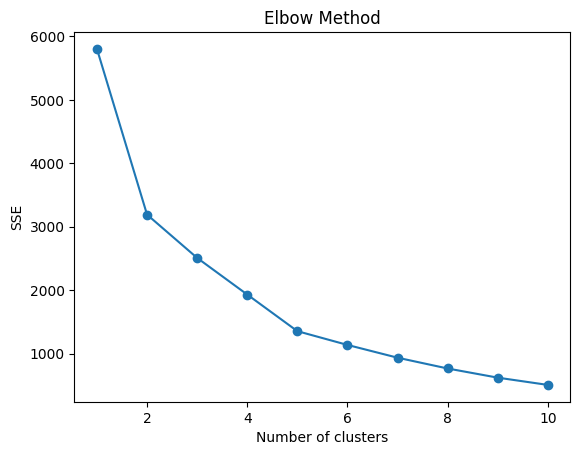

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data
# df_grouped = pd.read_csv('path_to_your_file.csv')

# Select only numeric columns for clustering
numeric_cols = ['followers_count', 'follows_count', 'posts_count', 'total_likes', 'total_comments', 'total_views']
df_numeric = df_grouped[numeric_cols]

# Handle any missing values (if necessary)
df_numeric.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data
# df_grouped = pd.read_csv('/path/to/your/csv/file.csv')

# Select only numeric columns for clustering
numeric_cols = ['followers_count', 'follows_count', 'posts_count', 'total_likes', 'total_comments', 'total_views']
df_numeric = df_grouped[numeric_cols]

# Handle any missing values (if necessary)
df_numeric.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply K-Means Clustering with 3 clusters
optimal_clusters_3 = 3
kmeans_3 = KMeans(n_clusters=optimal_clusters_3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_data)

# Add cluster labels to the original data
df_grouped['cluster_3'] = clusters_3

# Evaluate the clusters with 3 clusters
silhouette_avg_3 = silhouette_score(scaled_data, clusters_3)
print(f'Silhouette Score for 3 clusters: {silhouette_avg_3}')

# Apply K-Means Clustering with 4 clusters
optimal_clusters_4 = 4
kmeans_4 = KMeans(n_clusters=optimal_clusters_4, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_data)

# Add cluster labels to the original data
df_grouped['cluster_4'] = clusters_4

# Evaluate the clusters with 4 clusters
silhouette_avg_4 = silhouette_score(scaled_data, clusters_4)
print(f'Silhouette Score for 4 clusters: {silhouette_avg_4}')

# Display the clustered data
print(df_grouped)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3762347151.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(0, inplace=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 clusters: 0.9305943339051157
Silhouette Score for 4 clusters: 0.7629855905238547
      profile_id              username  followers_count  follows_count  \
0          50058                zitter               20              0   
1         287535                  ziti               63              0   
2        1503892                zither                6              0   
3        2682316             zosterops             1189            187   
4        6591524      roccolovesclover              779           1443   
..           ...                   ...              ...            ...   
962  65931281119          zynthyyy0168              147            146   
963  66036782385  herpeszoster.univasf              100              4   
964  66127679172             zorillah7              465            907   
965  66304875603                wzings               62             22   
966  66350939544   zingstar__inspector              533              2   

     po

In [30]:
df_grouped

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views,engagement_rate,interection_rate,cluster_3,cluster_4,cluster
0,50058,zitter,20,0,4,12,0,0,3.000000,0.000000,0,0,0
1,287535,ziti,63,0,1,18,18,0,18.000000,18.000000,0,0,0
2,1503892,zither,6,0,7,16,0,0,2.285714,0.000000,0,0,0
3,2682316,zosterops,1189,187,193,11460,933,14872,59.378238,4.834197,0,0,0
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019,18.568296,1.645363,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,65931281119,zynthyyy0168,147,146,3,25,1,0,8.333333,0.333333,0,0,0
963,66036782385,herpeszoster.univasf,100,4,9,54,2,0,6.000000,0.222222,0,0,0
964,66127679172,zorillah7,465,907,6,402,5,0,67.000000,0.833333,0,0,0
965,66304875603,wzings,62,22,8,271,68,1526,33.875000,8.500000,0,0,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\1858448591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(0, inplace=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib

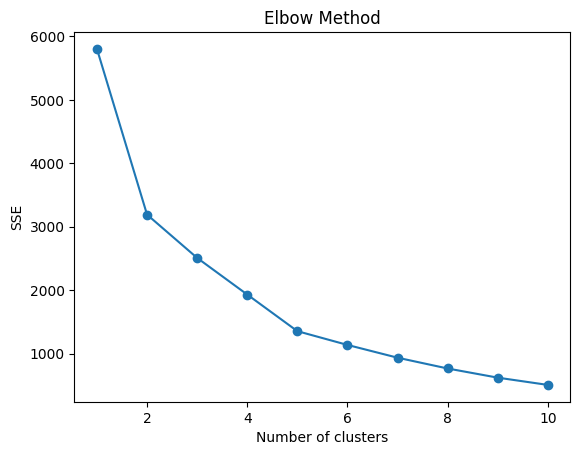

Silhouette Score: 0.7629855905238547
      profile_id              username  followers_count  follows_count  \
0          50058                zitter               20              0   
1         287535                  ziti               63              0   
2        1503892                zither                6              0   
3        2682316             zosterops             1189            187   
4        6591524      roccolovesclover              779           1443   
..           ...                   ...              ...            ...   
962  65931281119          zynthyyy0168              147            146   
963  66036782385  herpeszoster.univasf              100              4   
964  66127679172             zorillah7              465            907   
965  66304875603                wzings               62             22   
966  66350939544   zingstar__inspector              533              2   

     posts_count  total_likes  total_comments  total_views  engagement_rat

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your data
# df_grouped = pd.read_csv('/mnt/data/path_to_your_csv_file.csv')

# Select only numeric columns for clustering
numeric_cols = ['followers_count', 'follows_count', 'posts_count', 'total_likes', 'total_comments', 'total_views']
df_numeric = df_grouped[numeric_cols]

# Handle any missing values (if necessary)
df_numeric.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters (e.g., k=4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
df_grouped['cluster'] = clusters

# Evaluate the clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Display the clustered data
print(df_grouped)


In [33]:
def classify_profile(profile_data, kmeans_model, scaler, df_grouped):
    # Normalize the new profile data
    profile_data_normalized = scaler.transform([profile_data])
    
    # Predict the cluster for the new profile
    cluster_label = kmeans_model.predict(profile_data_normalized)[0]
    
    # Retrieve all profiles in the same cluster
    profiles_in_cluster = df_grouped[df_grouped['cluster'] == cluster_label]
    
    return cluster_label, profiles_in_cluster

# Example profile data to classify (replace with actual data)
new_profile_data = [200, 150, 10, 500, 20, 1000]  # Example profile feature values

# Classify the new profile and retrieve all profiles in the same cluster
cluster_label, profiles_in_cluster = classify_profile(new_profile_data, kmeans, scaler, df_grouped)

print(f'The new profile belongs to cluster: {cluster_label}')
print('Profiles in the same cluster:')
print(profiles_in_cluster)


The new profile belongs to cluster: 0
Profiles in the same cluster:
      profile_id              username  followers_count  follows_count  \
0          50058                zitter               20              0   
1         287535                  ziti               63              0   
2        1503892                zither                6              0   
3        2682316             zosterops             1189            187   
4        6591524      roccolovesclover              779           1443   
..           ...                   ...              ...            ...   
962  65931281119          zynthyyy0168              147            146   
963  66036782385  herpeszoster.univasf              100              4   
964  66127679172             zorillah7              465            907   
965  66304875603                wzings               62             22   
966  66350939544   zingstar__inspector              533              2   

     posts_count  total_likes  total_commen

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Test profiles
test_profiles = [
    [200, 150, 10, 500, 20, 1000],
    [50, 30, 5, 100, 10, 200],
    [1000, 800, 50, 3000, 100, 5000]
]

for i, profile in enumerate(test_profiles):
    cluster_label, profiles_in_cluster = classify_profile(profile, kmeans, scaler, df_grouped)
    print(f'Test Profile {i+1} belongs to cluster: {cluster_label}')
    print(f'Profiles in the same cluster as Test Profile {i+1}:')
    print(profiles_in_cluster)
    print('\n')


Test Profile 1 belongs to cluster: 0
Profiles in the same cluster as Test Profile 1:
      profile_id              username  followers_count  follows_count  \
0          50058                zitter               20              0   
1         287535                  ziti               63              0   
2        1503892                zither                6              0   
3        2682316             zosterops             1189            187   
4        6591524      roccolovesclover              779           1443   
..           ...                   ...              ...            ...   
962  65931281119          zynthyyy0168              147            146   
963  66036782385  herpeszoster.univasf              100              4   
964  66127679172             zorillah7              465            907   
965  66304875603                wzings               62             22   
966  66350939544   zingstar__inspector              533              2   

     posts_count  total_li

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


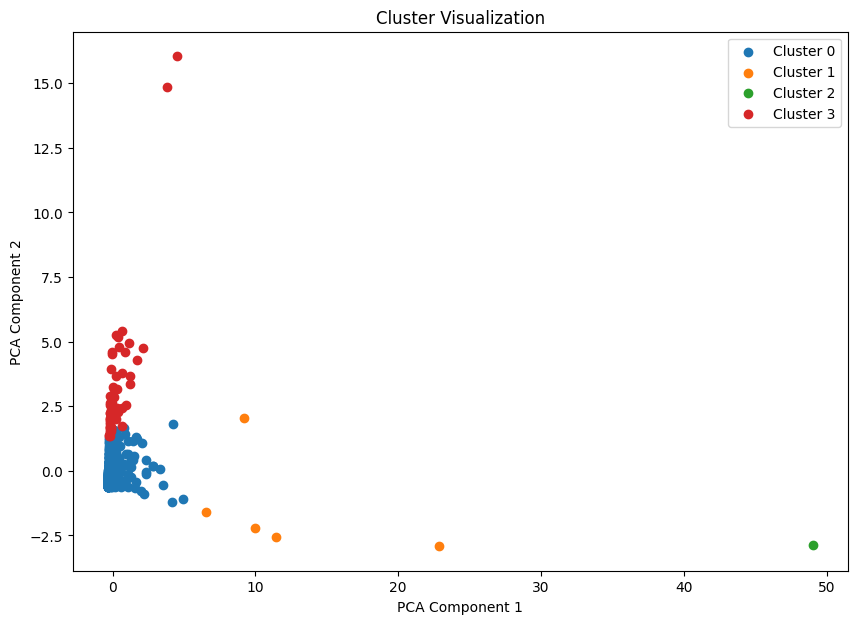

In [37]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 7))
for i in range(optimal_clusters):
    plt.scatter(pca_data[clusters == i, 0], pca_data[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


In [44]:
# Filter the DataFrame to get all profiles belonging to cluster 3
cluster_3_profiles = df_grouped[df_grouped['cluster'] == 1]

# Display the profiles in cluster 3
print(cluster_3_profiles)


      profile_id           username  followers_count  follows_count  \
123   1412636104  pequenosprincipes           413435            145   
129   1504885374       dreamandwear            36648            806   
155   1742205365       okay.ainsley           147978            275   
760  55835289019     zakir.zindabad           111267              5   
840  60700179597     owaisizindabad           218534              2   

     posts_count  total_likes  total_comments  total_views  engagement_rate  \
123         2211     10199017          362456     73512582      4612.852555   
129         4919      2852126          374852        55262       579.818256   
155          210      5661369           13040     23737231     26958.900000   
760          626      9793434           23322     64644039     15644.463259   
840          377      7689232           74726     28557485     20395.840849   

     interection_rate  cluster_3  cluster_4  cluster  
123        163.933062          1          1

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

# Load your data
# df_grouped = pd.read_csv('/mnt/data/path_to_your_csv_file.csv')

# Select only numeric columns for clustering
numeric_cols = ['followers_count', 'follows_count', 'posts_count', 'total_likes', 'total_comments', 'total_views']
df_numeric = df_grouped[numeric_cols]

# Handle any missing values (if necessary)
df_numeric.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Train the K-Means model with the optimal number of clusters (e.g., k=4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)

# Save the trained model and scaler to a .pkl file
with open('similarLooklikeModel.pkl', 'wb') as f:
    pickle.dump((scaler, kmeans), f)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3286543814.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(0, inplace=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Processing pipeline

In [ ]:
def classify_new_profile(new_profile, model_file):
    # Load the trained model and scaler from the .pkl file
    with open(model_file, 'rb') as f:
        scaler, kmeans = pickle.load(f)
    
    # Normalize the new profile data
    new_profile_scaled = scaler.transform([new_profile])
    
    # Predict the cluster for the new profile
    cluster_label = kmeans.predict(new_profile_scaled)[0]
    
    return cluster_label

# Example usage
new_profile = [200, 150, 10, 500, 20, 1000, 25.0, 1.0]
cluster = classify_new_profile(new_profile, '/mnt/data/kmeans_model.pkl')
print(f'The new profile belongs to cluster: {cluster}')


training pipeline

In [ ]:
def update_model_with_new_data(new_data, existing_model_file, output_model_file):
    # Load the existing model and scaler from the .pkl file
    with open(existing_model_file, 'rb') as f:
        scaler, kmeans = pickle.load(f)
    
    # Load your existing data
    df_grouped = pd.read_csv('/mnt/data/path_to_your_csv_file.csv')

    # Convert new data to DataFrame and concatenate with existing data
    new_data_df = pd.DataFrame([new_data], columns=numeric_cols)
    df_combined = pd.concat([df_grouped, new_data_df], ignore_index=True)
    
    # Select only numeric columns for clustering
    df_numeric = df_combined[numeric_cols]

    # Handle any missing values (if necessary)
    df_numeric.fillna(0, inplace=True)

    # Normalize the data
    scaled_data = scaler.fit_transform(df_numeric)

    # Re-train the K-Means model
    optimal_clusters = 4
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(scaled_data)

    # Save the updated model and scaler to a new .pkl file
    with open(output_model_file, 'wb') as f:
        pickle.dump((scaler, kmeans), f)

# Example usage
new_data = [200, 150, 10, 500, 20, 1000, 25.0, 1.0]
update_model_with_new_data(new_data, 'similarLooklike.pkl', 'updated_SimiliarLooklike.pkl')


In [2]:
import pandas as pd
import joblib

# Load the saved pipeline
pipeline = joblib.load('fake_follower_prediction_pipeline.pkl')

# Example input data (this should be in the same format as used during training)
input_data = pd.DataFrame({
    'rank': [1, 2, 3],
    'influence_score': [92, 91, 90],
    'posts': ['3.3k', '6.9k', '0.89k'],  # This will be converted to numerical values by the pipeline
    'followers': [475800000.0, 366200000.0, 357300000.0],
    'total_likes': [2.9e10, 5.74e10, 6e9],
    'country': ['Spain', 'United States', 'Argentina'],
    'calculated_er': [6094.997898, 15674.494812, 1679.261125]
})

# Use the pipeline to predict fake follower percentage
predictions = pipeline.predict(input_data)

# Calculate the number of fake followers and real followers
input_data['fake_follower_percentage'] = predictions
input_data['fake_followers'] = (input_data['fake_follower_percentage'] / 100) * input_data['followers']
input_data['real_followers'] = input_data['followers'] - input_data['fake_followers']

# Print the detailed results
# print(input_data[['channel_info', 'followers', 'fake_follower_percentage', 'fake_followers', 'real_followers']])

# Calculate the total number of influencers, real followers, and fake followers
total_influencers = len(input_data)
total_fake_followers = input_data['fake_followers'].sum()
total_real_followers = input_data['real_followers'].sum()

# Print the aggregate results
print(f"Total Influencers: {total_influencers}")
print(f"Total Fake Followers: {total_fake_followers}")
print(f"Total Real Followers: {total_real_followers}")


AttributeError: Can't get attribute 'DataPreprocessor' on <module '__main__'>